### CoAuthors -  Aishwarya, Rohit , Archita

### Importing Necessary Python Libraries

In [30]:
import time
import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt


from collections import Counter
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score


warnings.filterwarnings('ignore')

In [31]:
churn_df = pd.read_csv('../data/churn_final.csv')
churn_df

,call_failure,complains,subs_len,charge_amount,seconds_of_use,freq_of_use,freq_of_sms,distinct_call_nums,tariff_plan,status,age,ageGroup,customer_value,FN,FP,Churn
0,8,0,38,0,4370,71.000000,5.000000,17.0,1,1,5,1,197.640,177.8760,69.7640,0
1,0,0,39,0,0,5.000000,7.000000,4.0,1,1,6,1,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60.000000,359.000000,24.0,1,1,2,1,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66.000000,1.000000,35.0,1,1,10,1,240.020,216.0180,74.0020,0
4,3,0,32,0,2393,58.000000,2.000000,33.0,1,1,9,1,145.805,131.2245,64.5805,0
5,11,0,38,1,3775,82.000000,32.000000,0.0,1,1,15,1,282.280,254.0520,78.2280,0
6,4,0,38,0,2360,39.000000,285.000000,18.0,1,1,1,1,1235.960,1112.3640,173.5960,0
7,13,0,37,2,9115,121.000000,144.000000,43.0,1,1,15,1,945.440,850.8960,144.5440,0
8,7,0,38,0,13773,169.000000,73.262238,44.0,1,1,15,1,557.680,501.9120,105.7680,0
9,7,0,38,1,4515,83.000000,2.000000,25.0,1,1,11,1,191.920,172.7280,69.1920,0


<b> *The given dataset has severe class imbalance* </b>

In [32]:

def countplot(x,df):
    """Countplot"""
    sns.set_style("dark")
    sns.set(rc={'figure.figsize':(8,8)})
    sns.countplot(x=x, data=df, palette=sns.color_palette("Paired", 7), saturation=10)
    plt.title('Count plot',fontsize = 20);
    plt.savefig('Countplot.png')
    plt.show()

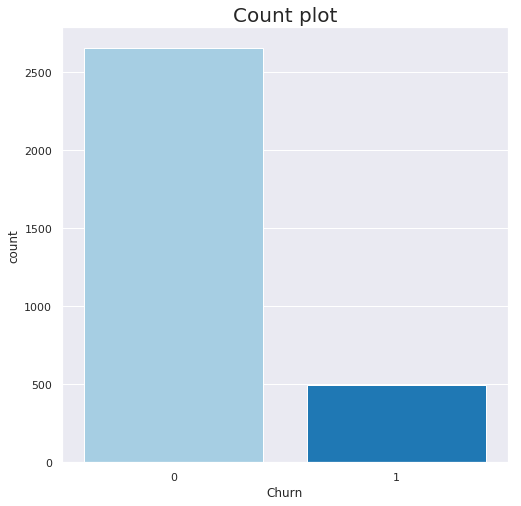

In [33]:
countplot('Churn',churn_df)

<b> *Challenge of working with imbalanced datasets:* </b>
<br>    Most machine learning techniques will ignore, and in turn have poor performance on, the minority class
<br> Biased predictions
<br> Misleading accuracy

<b> *Ways to addressing imbalanced datasets:* </b>
<br>    Oversample the minority class 

<b> Synthetic Minority Oversampling Technique </b>
<br>  It involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

<b> Balance the classes by increasing minority or decreasing majority </b>
<br> Random Under-sampling</br>
- Randomly remove majority class observations
- Helps balance the dataset
- Discarded observations could have important information
- May lead to bias
<br> Or undersampling majority dataset</br>
- Randomly add more minority observations by replication
- No information loss
- Prone to overfitting due to copying same information

In [34]:
#split the data
X = churn_df.iloc[:,:15]

#store the output variable in y
y = churn_df.iloc[:,15]

In [35]:
# Scaling data to 0 to 1

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
# split data to X train/test and Y train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

# cross-validation with 5 splits
cv = StratifiedShuffleSplit(n_splits=5, random_state = 88)


In [37]:
# Applying SMOTE technique

sm = SMOTE(random_state=12, sampling_strategy = 1.0)
X_smote, y_smote  = sm.fit_resample(X, y)

In [38]:
counter = Counter(y_smote)
print(counter)

Counter({0: 2655, 1: 2655})


Here, after applying SMOTE we treat the imbalanced data and we are able to get same number of values for both the categories i.e, churn and non-churn

In [39]:
#scale smote data
scaler.fit(X_smote)
X_scaled_smote = scaler.transform(X_smote)

In [40]:
# split data to X train/test and Y train/test
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_scaled_smote, y_smote, test_size=0.30, random_state=100, stratify = y_smote)

### Resampling technique - Undersampling

In [41]:
# class count
class_count_0, class_count_1 = churn_df['Churn'].value_counts()
# divie class
class_0 = churn_df[churn_df['Churn'] == 0]
class_1 = churn_df[churn_df['Churn'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (2655, 16)

class 1: (495, 16)


total class of 1 and 0:
 1    495
0    495
Name: Churn, dtype: int64


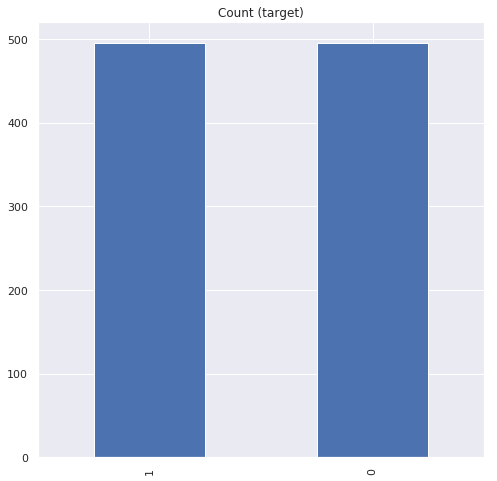

In [42]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Churn'].value_counts())

test_under['Churn'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [43]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = "\n"
    str_out += ("#####  TEST SCORES  #####\n--------------------")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n--------------------\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n--------------------\n")

    #print classification report
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

### XGBoost model without sampling


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9513

AUC: 0.8859

CONFUSION MATRIX:
--------------------
[[782  15]
 [ 31 117]]

--------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       797
           1       0.89      0.79      0.84       148

    accuracy                           0.95       945
   macro avg       0.92      0.89      0.90       945
weighted avg       0.95      0.95      0.95       945



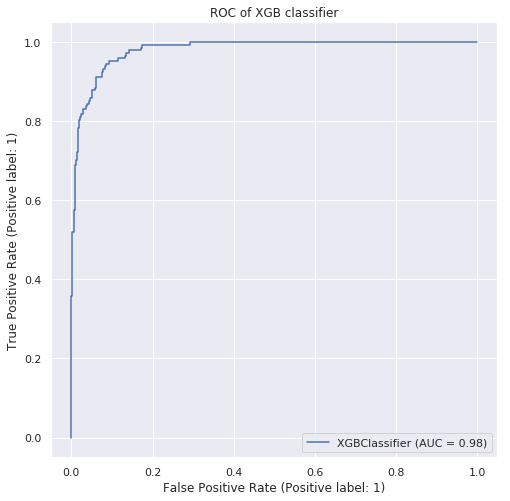

In [44]:
# Train xgbclassifier on train data
xgb = XGBClassifier(eval_metric='mlogloss')
# Fit xgbclassifier on train data
xgb.fit(X_train, Y_train)
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
results, false = display_test_scores(Y_test, predictions)
print(results)
#plot ROC curve
metrics.plot_roc_curve(xgb, X_test, Y_test)
plt.title("ROC of XGB classifier")
plt.show()

### XGBoost model with SMOTE 


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9711

AUC: 0.9711

CONFUSION MATRIX:
--------------------
[[769  28]
 [ 18 778]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       797
           1       0.97      0.98      0.97       796

    accuracy                           0.97      1593
   macro avg       0.97      0.97      0.97      1593
weighted avg       0.97      0.97      0.97      1593



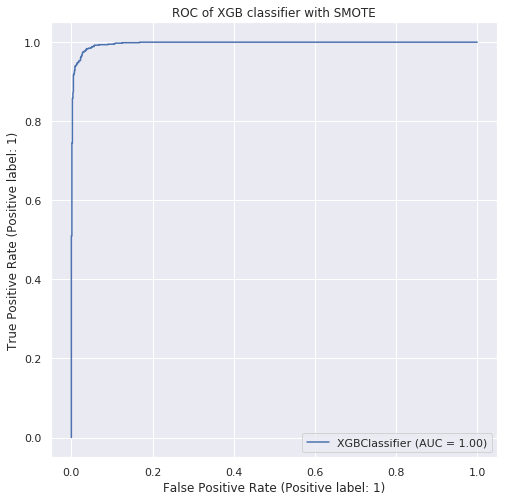

In [45]:
# Train xgbclassifier on smote_train data
xgb_smote_clf = XGBClassifier(eval_metric='mlogloss')
# Fit xgbclassifier on smote_train data
xgb_smote_clf.fit(X_smote_train,Y_smote_train)
# make predictions for test data
y_pred = xgb_smote_clf.predict(X_smote_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
results, false = display_test_scores(Y_smote_test, predictions)
print(results)
#plot ROC curve
metrics.plot_roc_curve(xgb_smote_clf, X_smote_test, Y_smote_test)
plt.title("ROC of XGB classifier with SMOTE")
plt.show()

### Naive-Bayes Classifier without sampling 


*************************GaussianNB()****************************************


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.6423

AUC: 0.7577

CONFUSION MATRIX:
--------------------
[[470 327]
 [ 11 137]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.59      0.74       797
           1       0.30      0.93      0.45       148

    accuracy                           0.64       945
   macro avg       0.64      0.76      0.59       945
weighted avg       0.87      0.64      0.69       945



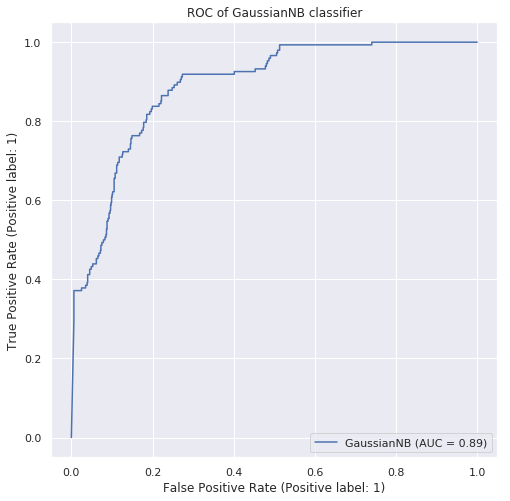


****************************MultinomialNB()*************************************


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8942

AUC: 0.6759

CONFUSION MATRIX:
--------------------
[[792   5]
 [ 95  53]]

--------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       797
           1       0.91      0.36      0.51       148

    accuracy                           0.89       945
   macro avg       0.90      0.68      0.73       945
weighted avg       0.90      0.89      0.87       945



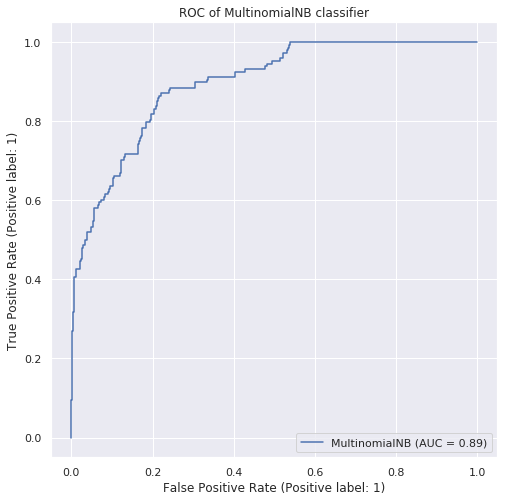


****************************ComplementNB_clf()*************************************


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8095

AUC: 0.8045

CONFUSION MATRIX:
--------------------
[[647 150]
 [ 30 118]]

--------------------
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       797
           1       0.44      0.80      0.57       148

    accuracy                           0.81       945
   macro avg       0.70      0.80      0.72       945
weighted avg       0.87      0.81      0.83       945



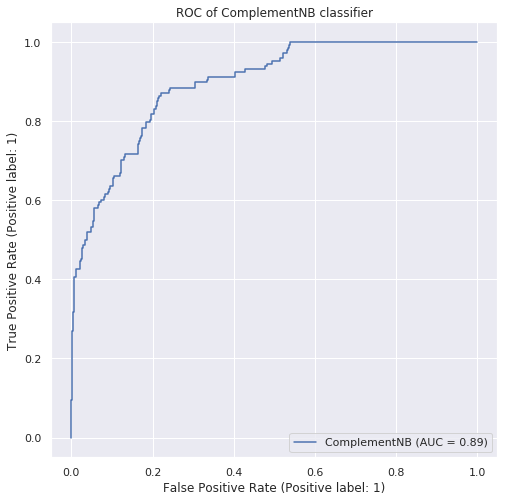

In [46]:
# Naive-Bayes with different approaches
# Naive-Bayes with different approaches

# fit GaussianNB classifier
# grid search for parameters
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, Y_train)



# print best scores
# print("The best parameters are %s with a score of %0.4f\n"
#       % (gaussian_clf.best_params_, gaussian_clf.best_score_))

# prediction results
y_pred = gaussian_clf.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(Y_test, y_pred)
print("\n*************************GaussianNB()****************************************\n")
print(results)

#plot ROC curve
metrics.plot_roc_curve(gaussian_clf, X_test, Y_test)
plt.title("ROC of GaussianNB classifier")
plt.show()


#====================================================================================================

# fit MultinomialNB classifier
Multinomial_clf = MultinomialNB()
Multinomial_clf.fit(X_train, Y_train)



# print best scores
# print("The best parameters are %s with a score of %0.4f\n"
#       % (Multinomial_clf.best_params_, Multinomial_clf.best_score_))

# prediction results
y_pred = Multinomial_clf.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(Y_test, y_pred)
print("\n****************************MultinomialNB()*************************************\n")
print(results)

#plot ROC curve
metrics.plot_roc_curve(Multinomial_clf, X_test, Y_test)
plt.title("ROC of MultinomialNB classifier")
plt.show()



#====================================================================================================

ComplementNB_clf = ComplementNB()
ComplementNB_clf.fit(X_train, Y_train)


# print best scores
# print("The best parameters are %s with a score of %0.4f\n"
#       % (Multinomial_clf.best_params_, Multinomial_clf.best_score_))

# prediction results
y_pred = ComplementNB_clf.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(Y_test, y_pred)
print("\n****************************ComplementNB_clf()*************************************\n")
print(results)

#plot ROC curve
metrics.plot_roc_curve(ComplementNB_clf, X_test, Y_test)
plt.title("ROC of ComplementNB classifier")
plt.show()


### Naive-Bayes Classifier using SMOTE sampling


*************************GaussianNB() with SMOTE sampling****************************************


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7451

AUC: 0.7453

CONFUSION MATRIX:
--------------------
[[434 363]
 [ 43 753]]

--------------------
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       797
           1       0.67      0.95      0.79       796

    accuracy                           0.75      1593
   macro avg       0.79      0.75      0.73      1593
weighted avg       0.79      0.75      0.73      1593



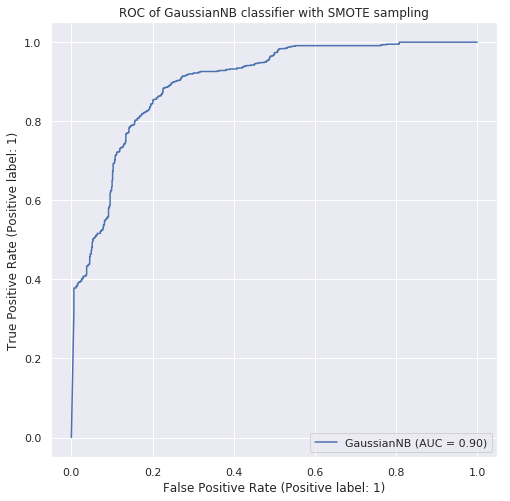


****************************MultinomialNB() with SMOTE sampling*************************************


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8286

AUC: 0.8286

CONFUSION MATRIX:
--------------------
[[640 157]
 [116 680]]

--------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       797
           1       0.81      0.85      0.83       796

    accuracy                           0.83      1593
   macro avg       0.83      0.83      0.83      1593
weighted avg       0.83      0.83      0.83      1593



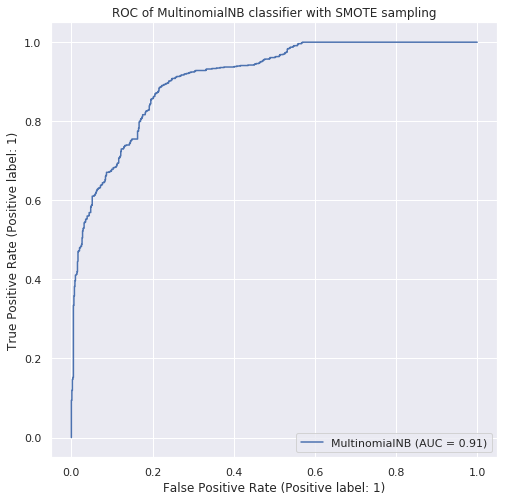


****************************ComplementNB() with SMOTE sampling*************************************


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8293

AUC: 0.8293

CONFUSION MATRIX:
--------------------
[[641 156]
 [116 680]]

--------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       797
           1       0.81      0.85      0.83       796

    accuracy                           0.83      1593
   macro avg       0.83      0.83      0.83      1593
weighted avg       0.83      0.83      0.83      1593



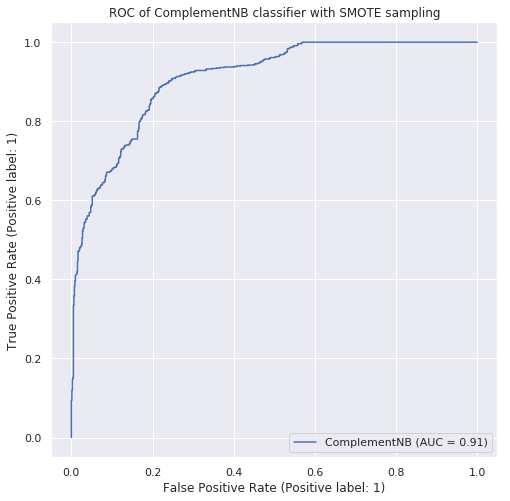

In [47]:
# Naive-Bayes with different approaches

# fit GaussianNB classifier
# grid search for parameters
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_smote_train, Y_smote_train)



# print best scores
# print("The best parameters are %s with a score of %0.4f\n"
#       % (gaussian_clf.best_params_, gaussian_clf.best_score_))

# prediction results
y_pred = gaussian_clf.predict(X_smote_test)

# print accuracy metrics
results, false = display_test_scores(Y_smote_test, y_pred)
print("\n*************************GaussianNB() with SMOTE sampling****************************************\n")
print(results)

#plot ROC curve
metrics.plot_roc_curve(gaussian_clf, X_smote_test, Y_smote_test)
plt.title("ROC of GaussianNB classifier with SMOTE sampling")
plt.show()


#====================================================================================================

# fit MultinomialNB classifier
Multinomial_clf = MultinomialNB()
Multinomial_clf.fit(X_smote_train, Y_smote_train)



# print best scores
# print("The best parameters are %s with a score of %0.4f\n"
#       % (Multinomial_clf.best_params_, Multinomial_clf.best_score_))

# prediction results
y_pred = Multinomial_clf.predict(X_smote_test)

# print accuracy metrics
results, false = display_test_scores(Y_smote_test, y_pred)
print("\n****************************MultinomialNB() with SMOTE sampling*************************************\n")
print(results)

#plot ROC curve
metrics.plot_roc_curve(Multinomial_clf, X_smote_test, Y_smote_test)
plt.title("ROC of MultinomialNB classifier with SMOTE sampling")
plt.show()



#====================================================================================================

ComplementNB_clf = ComplementNB()
ComplementNB_clf.fit(X_smote_train, Y_smote_train)


# print best scores
# print("The best parameters are %s with a score of %0.4f\n"
#       % (Multinomial_clf.best_params_, Multinomial_clf.best_score_))

# prediction results
y_pred = ComplementNB_clf.predict(X_smote_test)

# print accuracy metrics
results, false = display_test_scores(Y_smote_test, y_pred)
print("\n****************************ComplementNB() with SMOTE sampling*************************************\n")
print(results)

#plot ROC curve
metrics.plot_roc_curve(ComplementNB_clf, X_smote_test, Y_smote_test)
plt.title("ROC of ComplementNB classifier with SMOTE sampling")
plt.show()


#### TODO: Interactive ROC curve

In [48]:
# def plot_interactive_roc_curve(df, fpr, tpr, thresholds):
#     fig = px.area(
#         data_frame=df, 
#         x=fpr, 
#         y=tpr,
#         hover_data=thresholds, 
#         title='ROC Curve'
#     )
#     fig.update_layout(
#         autosize=False,
#         width=500,
#         height=500,
#         margin=dict(l=30, r=30, b=30, t=30, pad=4),
#         title_x=.5, # Centre title
#         hovermode = 'closest',
#         xaxis=dict(hoverformat='.4f'),
#         yaxis=dict(hoverformat='.4f')
#     )
#     hovertemplate = 'False Positive Rate=%{x}<br>True Positive Rate=%{y}<br>Threshold=%{customdata[0]:.4f}<extra></extra>'
#     fig.update_traces(hovertemplate=hovertemplate)
    
#     # Add dashed line with a slope of 1
#     fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
#     fig.show()
    
# plot_interactive_roc_curve(df=churn_df, 
#                            fpr='false_positive_rate', 
#                            tpr='true_positive_rate', 
#                            thresholds=['threshold'])